In [138]:
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.feature_selection import (SelectKBest, mutual_info_regression)
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error,
                             mean_squared_error, r2_score, root_mean_squared_error)
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [153]:
def preprocess_data(filename):
    data = pd.read_csv(filename)
    X = data.drop(data.columns[-1], axis=1)
    y = data[data.columns[-1]]

    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = y.select_dtypes(include=['object']).columns

    numerical_transformer = SimpleImputer(strategy='median')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])


    return X, y


In [69]:
def getLinearSVRScores(param_grid):
    model = LinearSVR(dual='auto', random_state=42)
    x,y, preprocessor = preprocess_data("train.csv")
    # Standardize the features
    #scaler = StandardScaler(with_mean=False)
    #x_scaled = scaler.fit_transform(x)

    feature_selection = SelectKBest(score_func=mutual_info_regression, k=20)

    print(x.head())
    print(y.head())

    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selection),
        ('regressor', model)
    ])


    # Initialize RepeatedKFold
    rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=rkf, scoring='neg_mean_squared_error')

    # Fit the grid search to the data
    grid_search.fit(x, y)

    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Print the best parameters
    print("Best Parameters:", best_params)
    
    # Print the best estimator
    print("Best Estimator:", best_estimator)

    # Calculate RMSE using the best estimator
    y_pred = best_estimator.predict(x)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred))
    print("Root Mean Squared Error (RMSE):", root_mean_squared_error(y, y_pred))
    print("R2 Score:", r2_score(y, y_pred))  
    print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y, y_pred) * 100)
    return y, y_pred        
    # Print the indices of the selected features
    #print("Indices of selected features:", selected_feature_indices)

In [151]:
def getLinearSVRScores_2(param_grid):
    model = LinearSVR(dual='auto', random_state=42)
    X, y = preprocess_data("train.csv")

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    

    # Define cross-validation strategy
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get best parameters and best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Print the best parameters
    print("Best Parameters:", best_params)
    
    # Evaluate on the validation set
    y_val_pred = best_estimator.predict(X_val)
    print("Validation Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_val_pred))
    print("Validation Mean Squared Error (MSE):", mean_squared_error(y_val, y_val_pred))
    print("Validation Root Mean Squared Error (RMSE):", root_mean_squared_error(y_val, y_val_pred))
    print("Validation R2 Score:", r2_score(y_val, y_val_pred))
    print("Validation Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_val, y_val_pred) * 100)
    
    # Evaluate on the test set
    y_test_pred = best_estimator.predict(X_test)
    print("Test Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
    print("Test Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
    print("Test Root Mean Squared Error (RMSE):", root_mean_squared_error(y_test, y_test_pred))
    print("Test R2 Score:", r2_score(y_test, y_test_pred))
    print("Test Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_test_pred) * 100)
    
    return y_test, y_test_pred

In [152]:

params2 = {
        'C': [0.1, 1.0, 10.0],  # Regularization parameter
        'epsilon': [0.1, 0.2, 0.5],  # Epsilon parameter in the epsilon-insensitive loss function
        'max_iter': [1000, 5000, 10000]  # Maximum number of iterations
    
}

y_val, y_val_pred = getLinearSVRScores_2(params2)   


ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
351 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py", line 577, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'RL'

--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py", line 577, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'RM'


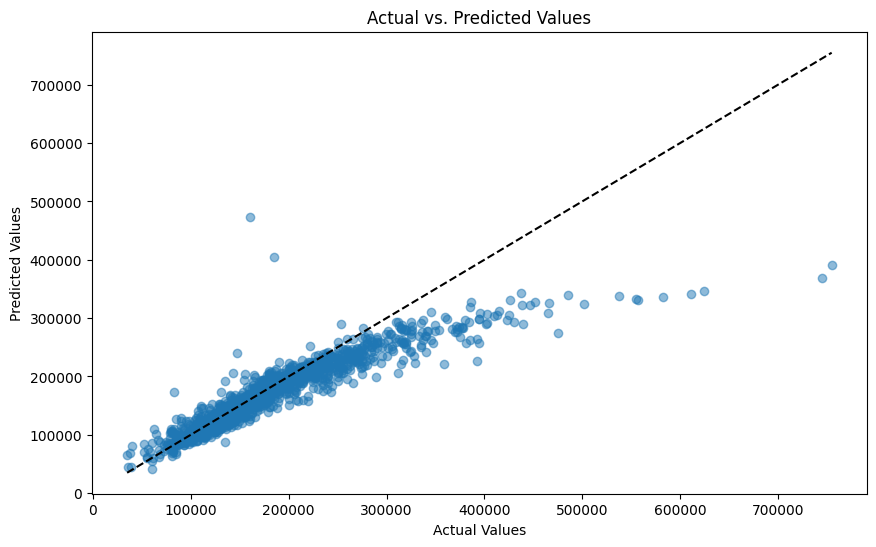

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--')  # A diagonal line where actual = predicted
plt.show()